<a href="https://colab.research.google.com/github/bahram3d/sales-analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing dataset
**Imports necessary libraries:**


In [2]:
import os
import pandas as pd


 **Loading CSV files**

In [3]:
files = [file for file in os.listdir('/content/Sales') if not file.startswith('.')]

In [4]:
files

['Sales_May_2019.csv',
 'Sales_October_2019.csv',
 'Sales_August_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_November_2019.csv',
 'Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv']

In [5]:
all_year_data = pd.DataFrame()


for file in files:
  month =pd.read_csv('/content/Sales/' + file ,header=0)
  all_year_data = pd.concat([all_year_data , month])
all_year_data.to_csv('yearly_sale.csv', index=False)


In [6]:

all_year = pd.read_csv('yearly_sale.csv')
all_year.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


Checking dataset

In [7]:
all_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
order_id_rows = all_year[all_year['Order ID'].str.contains('Order ID',na=False)]

order_id_rows


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
180129,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
180913,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
181771,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
182115,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [9]:
order_id_rows.index

Index([   964,    973,    975,   1318,   1355,   2945,   3043,   3936,   4466,
         5074,
       ...
       178240, 178645, 178827, 178884, 179332, 180129, 180913, 181771, 182115,
       186342],
      dtype='int64', length=355)

In [10]:
all_year.index

RangeIndex(start=0, stop=186850, step=1)

Removing multiple headers

In [11]:
df = all_year.drop(order_id_rows.index)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"
...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150,02/12/19 22:02,"227 Church St, San Francisco, CA 94016"
186846,162005,AAA Batteries (4-pack),2,2.99,02/04/19 20:44,"417 Jefferson St, Los Angeles, CA 90001"
186847,162006,USB-C Charging Cable,1,11.95,02/24/19 06:31,"498 8th St, Atlanta, GA 30301"
186848,162007,USB-C Charging Cable,1,11.95,02/24/19 19:09,"715 7th St, Dallas, TX 75001"


In [12]:
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 186495 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [13]:
NN = df.isna().sum()
NN

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
# droping na

df = df.dropna()


In [15]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [16]:

print(df['Price Each'].unique())
print(df['Quantity Ordered'].unique())


['11.99' '3.84' '149.99' '2.99' '700.0' '11.95' '14.95' '999.99' '379.99'
 '600.0' '150.0' '99.99' '300.0' '389.99' '700' '150' '1700' '109.99'
 '600' '400' '300' '400.0' '1700.0']
['1' '2' '3' '4' '5' '6' '7' '8' '9']


converting Price and quantity columns to numerical

In [17]:

df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')


<ipython-input-17-243e41a8cee1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'], errors='coerce')
<ipython-input-17-243e41a8cee1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'], errors='coerce')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  int64  
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.9+ MB


converting Date from text to date type and extracting new columns as Month, Year, Day of week, abd Time of Day

In [19]:

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Day of Week'] = df['Order Date'].dt.day_name()
df['Time of Day'] = pd.to_datetime(df['Order Date']).dt.hour

df.head()


<ipython-input-19-43a8a9311270>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-19-43a8a9311270>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-19-43a8a9311270>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Order D

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Time of Day
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,2019,Thursday,17
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,2019,Sunday,14
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,2019,Friday,11
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,2019,Thursday,20
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,2019,Saturday,22


Extracting City and State from address

In [20]:
df['City'] = df['Purchase Address'].str.split(',').str[1]
df['State'] = df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]

df.head()

<ipython-input-20-8ea2fd370df4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].str.split(',').str[1]
<ipython-input-20-8ea2fd370df4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['State'] = df['Purchase Address'].str.split(',').str[2].str.split(' ').str[1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Time of Day,City,State
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,2019,Thursday,17,New York City,NY
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,2019,Sunday,14,Dallas,TX
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,2019,Friday,11,New York City,NY
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,2019,Thursday,20,Dallas,TX
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,2019,Saturday,22,Seattle,WA


Creating a Sales column by multplying quantity and price

In [21]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

<ipython-input-21-c678c36d05c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Year,Day of Week,Time of Day,City,State,Sales
0,194095,Wired Headphones,1,11.99,2019-05-16 17:14:00,"669 2nd St, New York City, NY 10001",5,2019,Thursday,17,New York City,NY,11.99
1,194096,AA Batteries (4-pack),1,3.84,2019-05-19 14:43:00,"844 Walnut St, Dallas, TX 75001",5,2019,Sunday,14,Dallas,TX,3.84
2,194097,27in FHD Monitor,1,149.99,2019-05-24 11:36:00,"164 Madison St, New York City, NY 10001",5,2019,Friday,11,New York City,NY,149.99
3,194098,Wired Headphones,1,11.99,2019-05-02 20:40:00,"622 Meadow St, Dallas, TX 75001",5,2019,Thursday,20,Dallas,TX,11.99
4,194099,AAA Batteries (4-pack),2,2.99,2019-05-11 22:55:00,"17 Church St, Seattle, WA 98101",5,2019,Saturday,22,Seattle,WA,5.98


chacking statistical values for numerical Features

In [22]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Month,Year,Time of Day,Sales
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,7.059140,2019.000183,14.413305,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,1.000000,2019.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,4.000000,2019.000000,11.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,7.000000,2019.000000,15.000000,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,10.000000,2019.000000,19.000000,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,12.000000,2020.000000,23.000000,3400.000000
std,0.442793,332.731330,NaN,3.502996,0.013521,5.423416,332.919771


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
 6   Month             185950 non-null  int32         
 7   Year              185950 non-null  int32         
 8   Day of Week       185950 non-null  object        
 9   Time of Day       185950 non-null  int32         
 10  City              185950 non-null  object        
 11  State             185950 non-null  object        
 12  Sales             185950 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(3), int64(1), object(6)


# ***Exploratory data analysis***

Monthly sale

In [24]:

monthly_sales = df.groupby('Month')[['Sales', 'Quantity Ordered']].sum()
monthly_sales


,Sales,Quantity Ordered
Month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


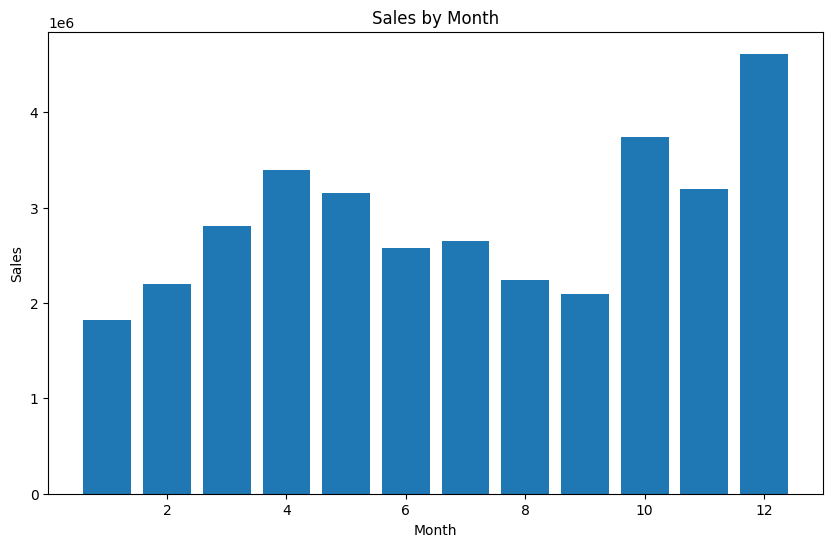

In [25]:

import matplotlib.pyplot as plt
monthly_sales = df.groupby('Month')['Sales'].sum()

# Create a bar chart of monthly sales
plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Sales by Month')
plt.show()


Sale by City

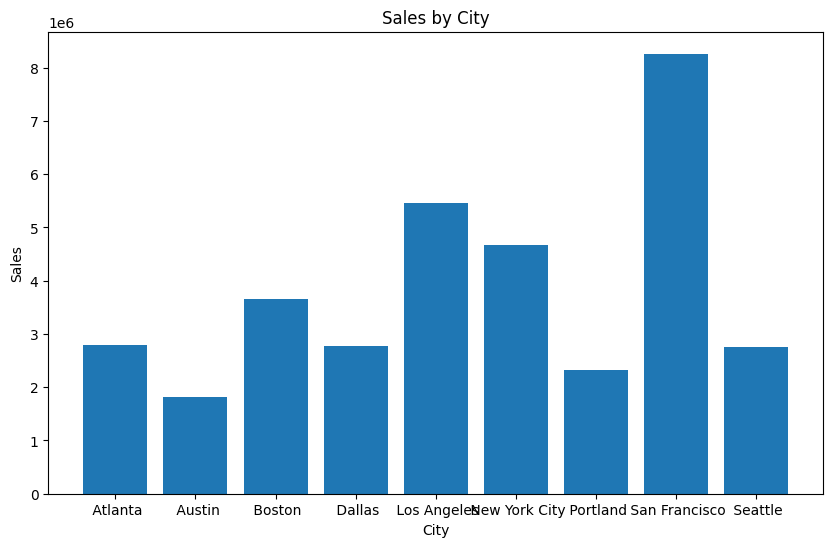

In [26]:
# prompt: sametinhg for city

import matplotlib.pyplot as plt
# Group sales by city
city_sales = df.groupby('City')['Sales'].sum()

# Create a bar chart of sales by city
plt.figure(figsize=(10, 6))
plt.bar(city_sales.index, city_sales.values)
plt.xlabel('City')
plt.ylabel('Sales')
plt.title('Sales by City')
plt.show()


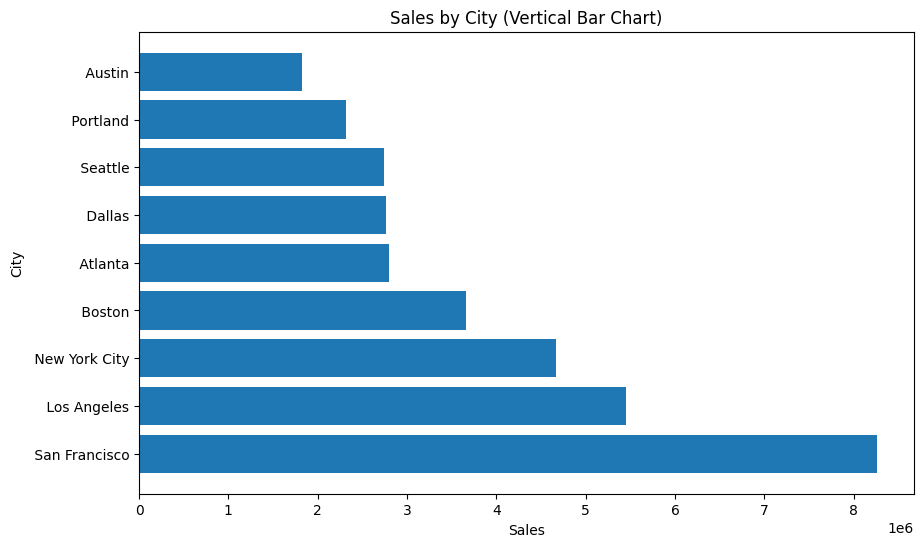

In [27]:
# prompt: make vertical bar chart for city sort by sales

import matplotlib.pyplot as plt
city_sales = df.groupby('City')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart of sales by city
plt.figure(figsize=(10, 6))
plt.barh(city_sales.index, city_sales.values)
plt.xlabel('Sales')
plt.ylabel('City')
plt.title('Sales by City (Vertical Bar Chart)')
plt.show()


Sales by Time of Day

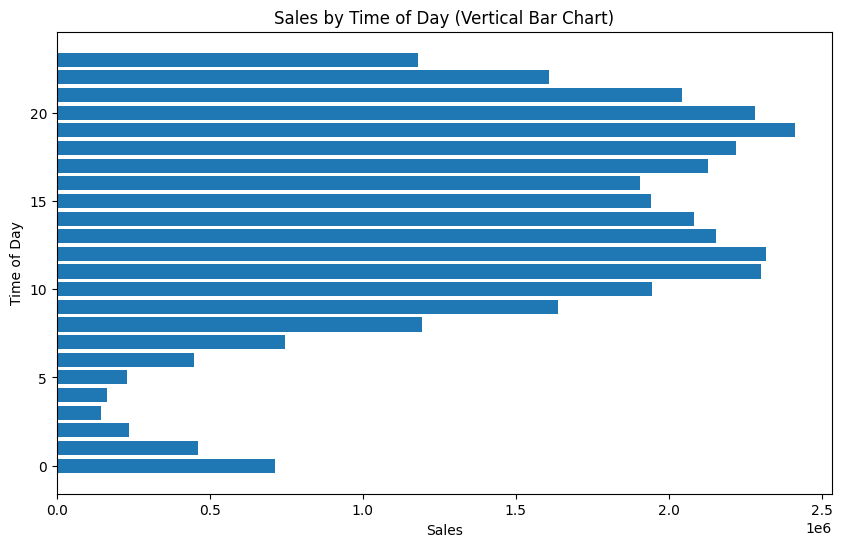

In [28]:
city_sales = df.groupby('Time of Day')['Sales'].sum()

# Create a bar chart of sales by city
plt.figure(figsize=(10, 6))
plt.barh(city_sales.index, city_sales.values)
plt.xlabel('Sales')
plt.ylabel('Time of Day')
plt.title('Sales by Time of Day (Vertical Bar Chart)')
plt.show()


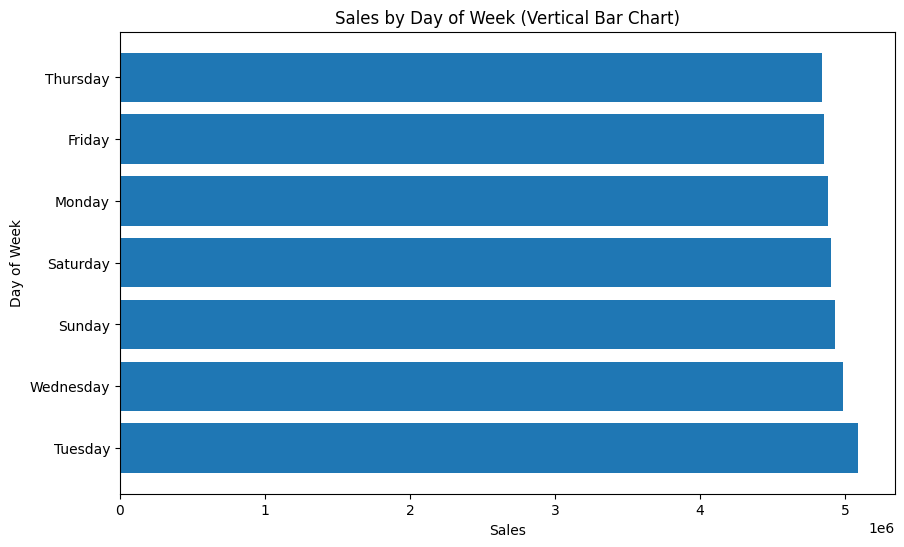

In [29]:
# prompt: sales by day of week chart

import matplotlib.pyplot as plt
day_of_week_sales = df.groupby('Day of Week')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart of sales by day of week
plt.figure(figsize=(10, 6))
plt.barh(day_of_week_sales.index, day_of_week_sales.values)
plt.xlabel('Sales')
plt.ylabel('Day of Week')
plt.title('Sales by Day of Week (Vertical Bar Chart)')
plt.show()


Which pair of product sales most

In [30]:
df.groupby('Product')['Order ID'].value_counts()

Product       Order ID
20in Monitor  276692      2
              171322      2
              193916      2
              141289      1
              226672      1
                         ..
iPhone        155365      1
              155428      1
              155464      1
              155488      1
              319665      1
Name: count, Length: 185639, dtype: int64

In [32]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Year', 'Day of Week', 'Time of Day',
       'City', 'State', 'Sales'],
      dtype='object')

In [33]:
order_products = df.groupby('Order ID')['Product'].apply(list).reset_index()
print(order_products)

       Order ID                       Product
0        141234                      [iPhone]
1        141235    [Lightning Charging Cable]
2        141236            [Wired Headphones]
3        141237            [27in FHD Monitor]
4        141238            [Wired Headphones]
...         ...                           ...
178432   319666    [Lightning Charging Cable]
178433   319667       [AA Batteries (4-pack)]
178434   319668             [Vareebadd Phone]
178435   319669            [Wired Headphones]
178436   319670  [Bose SoundSport Headphones]

[178437 rows x 2 columns]


In [35]:
from itertools import combinations
from collections import Counter

# Create a Counter to store product pairs
product_pair_counter = Counter()

# Iterate through each order's product list
for products in order_products['Product']:
    # Get all combinations of 2 products from the list
    product_pairs = combinations(products, 2)
    # Update the Counter with these pairs
    product_pair_counter.update(product_pairs)

# Display the most common product pairs
most_common_pairs = product_pair_counter.most_common()
print(most_common_pairs)

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92), (('Lightning Charging Cable', 'Apple Airpods Headphones'), 81), (('Vareebadd Phone', 'Bose SoundSport Headphones'), 80), (('USB-C Charging Cable', 'Bose SoundSport Headphones'), 77), (('Apple Airpods Headphones', 'Wired Headphones'), 69), (('Lightning Charging Cable', 'USB-C Charging Cable'), 58), (('Lightning Charging Cable', 'AA Batteries (4-pack)'), 55), (('Lightning Charging Cable', 'Lightning Charging Cable'), 54), (('Bose SoundSport Headphones', 'Wired Headphones'), 53), (('AA Batteries (4-pack)'

In [44]:
# prompt: make last step prints as presentable

import pandas as pd
# Create a DataFrame to display the most common product pairs
most_common_pairs_df = pd.DataFrame(most_common_pairs, columns=['Product Pair', 'Frequency'])

# Format the 'Frequency' column with commas
most_common_pairs_df['Frequency'] = most_common_pairs_df['Frequency'].apply(lambda x: "{:,}".format(x))
most_common_pairs_df.head(10)
# Display the DataFrame
#print(most_common_pairs_df.to_string(index=False))


,Product Pair,Frequency
0,"(iPhone, Lightning Charging Cable)","1,005"
1,"(Google Phone, USB-C Charging Cable)",987
2,"(iPhone, Wired Headphones)",447
3,"(Google Phone, Wired Headphones)",414
4,"(Vareebadd Phone, USB-C Charging Cable)",361
5,"(iPhone, Apple Airpods Headphones)",360
6,"(Google Phone, Bose SoundSport Headphones)",220
7,"(USB-C Charging Cable, Wired Headphones)",160
8,"(Vareebadd Phone, Wired Headphones)",143
9,"(Lightning Charging Cable, Wired Headphones)",92


In [46]:
# prompt: convert most_common_pairs_df['Product Pair'] to text

most_common_pairs_df['Product Pair'] = most_common_pairs_df['Product Pair'].apply(lambda x: ' '.join(map(str, x)))


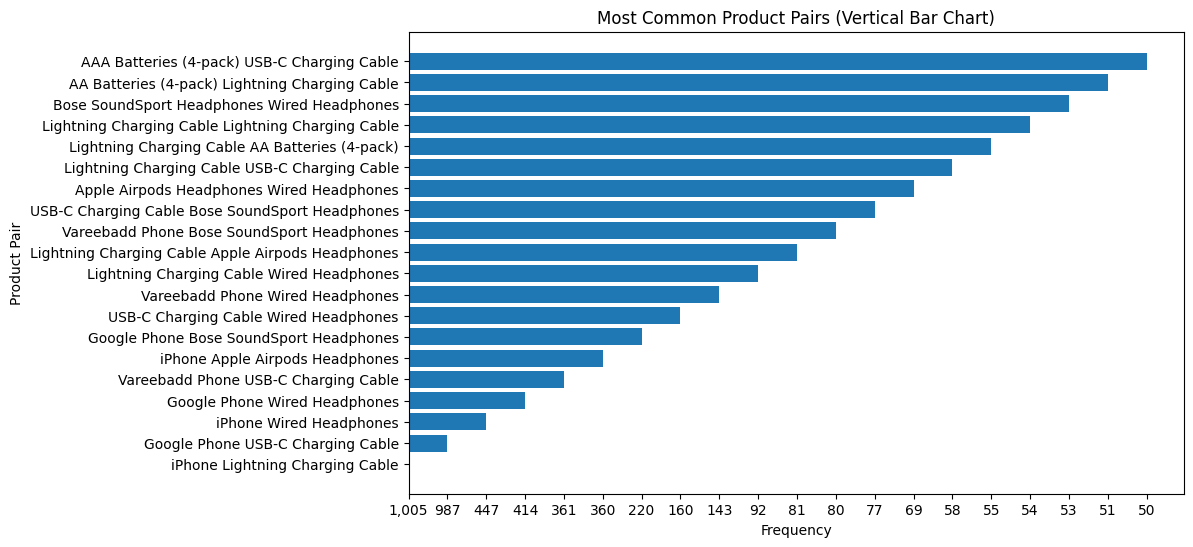

In [53]:


most_common_pairs_df = most_common_pairs_df.head(20)

plt.figure(figsize=(10, 6))
plt.barh(most_common_pairs_df['Product Pair'], most_common_pairs_df['Frequency'])
plt.xlabel('Frequency')
plt.ylabel('Product Pair')
plt.title('Most Common Product Pairs (Vertical Bar Chart)')
plt.show()


Most popular Product

In [54]:
df.groupby('Product')['Quantity Ordered'].sum()

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

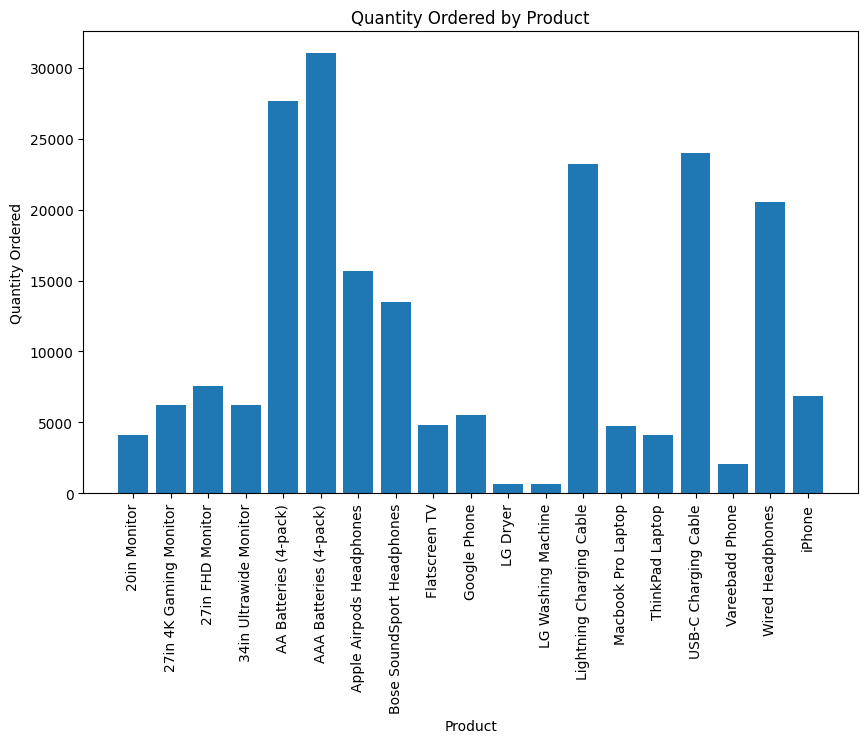

In [55]:
# prompt: chart above product

import matplotlib.pyplot as plt
product_sales = df.groupby('Product')['Quantity Ordered'].sum()

# Create a bar chart of product sales
plt.figure(figsize=(10, 6))
plt.bar(product_sales.index, product_sales.values)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Quantity Ordered by Product')
plt.xticks(rotation=90)
plt.show()


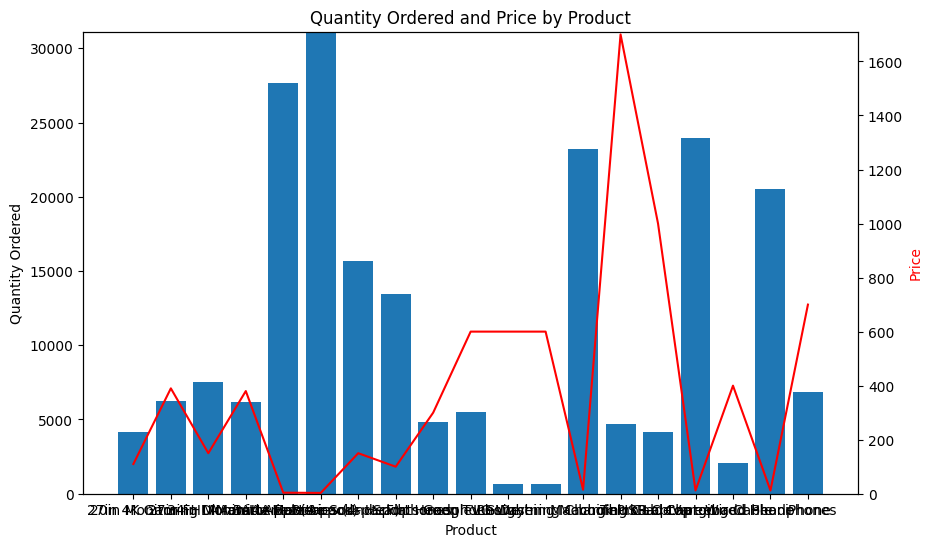

In [77]:
# prompt: same chart with price as linne in second axis

import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot quantity ordered as a bar chart
ax1.bar(product_sales.index, product_sales.values)
ax1.set_xlabel('Product')
ax1.set_ylabel('Quantity Ordered')

# Set the y-axis limits for the first plot
ax1.set_ylim(0, max(product_sales.values) + 100)

# Create a twin y-axis for price
ax2 = ax1.twinx()

# Plot price as a line chart
ax2.plot(product_sales.index, df.groupby('Product')['Price Each'].mean().values, color='red')
ax2.set_ylabel('Price', color='red')

# Set the y-axis limits for the second plot
ax2.set_ylim(0, max(df.groupby('Product')['Price Each'].mean().values) + 10)

# Show the plot
plt.xticks(rotation=90)
plt.title('Quantity Ordered and Price by Product')
plt.show()
